In [3]:
# Libraries
import math
import pandas as pd
import sympy as smp
import numpy as np
from sympy import *
from math import *

# Scipy stats
from scipy.stats import rv_discrete
from scipy.stats import binom
from scipy.stats import expon
from scipy.stats import geom
from scipy.stats import hypergeom
from scipy.stats import nbinom
from scipy.stats import norm
from scipy.stats import poisson
from scipy.stats import uniform

# Scipy operations
from scipy.integrate import quad
from scipy.misc import derivative
import scipy.integrate as integrate
import scipy.special as special

# Miscellaneous
import matplotlib.pyplot as plt
# from fractions import Fraction
from sympy import Rational as R
from sympy import nsimplify
from IPython.display import display, Math, Latex
%matplotlib inline
from IPython.display import Image, HTML

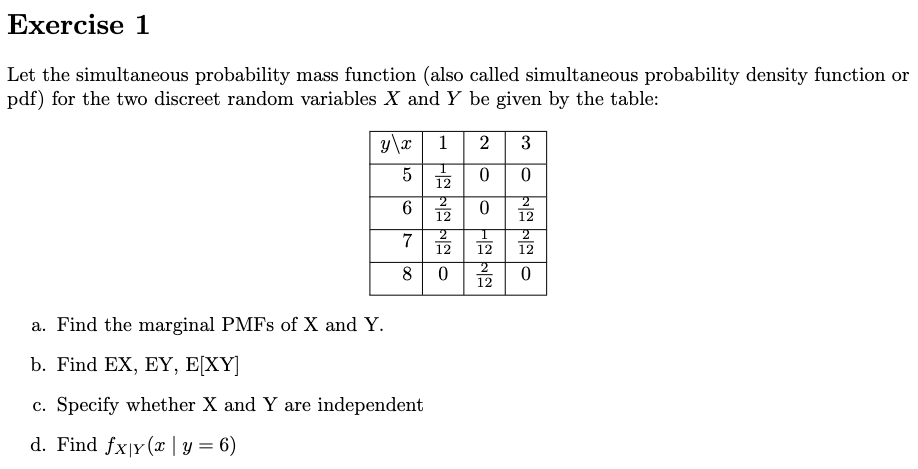

In [3]:
# Exercise 1
Image('https://cdn.mathpix.com/snip/images/RtWQV83rWyIK9jojw6dNDfxbMc5PrUgNMGakuF6fO-Q.original.fullsize.png', width = 500)

In [4]:
Index = [5, 6, 7, 8]
Columns = {
    1: [R(1,12), R(2,12), R(2,12), 0],
    2: [0, 0, R(1,12), R(2,12)],
    3: [0, R(2,12), R(2,12), 0]
}
joint_pmf_df = pd.DataFrame(data = Columns, index = Index)

In [5]:
# a)

# Calculate the marginal probabilities of X and Y
marginal_pmf_x = joint_pmf_df.sum(axis=0)
marginal_pmf_y = joint_pmf_df.apply(sum, axis=1)

print(marginal_pmf_x)
print(marginal_pmf_y)

1    5/12
2     1/4
3     1/3
dtype: object
5    1/12
6     1/3
7    5/12
8     1/6
dtype: object


In [61]:
# b)

marginal_pmf_x_values = marginal_pmf_x.values
marginal_pmf_y_values = marginal_pmf_y.values

EX = np.array(joint_pmf_df.columns).dot(marginal_pmf_x_values)
EY = np.array(joint_pmf_df.index).dot(marginal_pmf_y_values)
EXY = np.array(joint_pmf_df.index).dot(np.array(joint_pmf_df)).dot(np.array(joint_pmf_df.columns))

print("E[X]:  {} , {}".format(EX, round(float(EX), 2)))
print("E[Y]:  {} , {}".format(EY, round(float(EY), 2)))
print("E[X*Y]: {} , {}".format(EXY, round(float(EXY), 2)))

E[X]:  23/12 , 1.92
E[Y]:  20/3 , 6.67
E[X*Y]: 155/12 , 12.92


In [12]:
# c)

# Convert the DataFrame values to floating-point numbers
joint_pmf_float = joint_pmf_df.astype(float)

# Calculate the marginal probabilities of X and Y
marginal_pmf_x = joint_pmf_float.sum(axis=0)
marginal_pmf_y = joint_pmf_float.sum(axis=1)

# Check if X and Y are independent
is_independent = np.isclose(joint_pmf_float.values, marginal_pmf_y[:, np.newaxis] * marginal_pmf_x.values).all()

if is_independent:
    print("X and Y are independent.")
else:
    print("X and Y are not independent.")

X and Y are not independent.


/var/folders/22/rg8206c93c77krq73zpytwzr0000gn/T/ipykernel_26000/2077272263.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  is_independent = np.isclose(joint_pmf_float.values, marginal_pmf_y[:, np.newaxis] * marginal_pmf_x.values).all()


In [ ]:
# d) - Not practical in Python

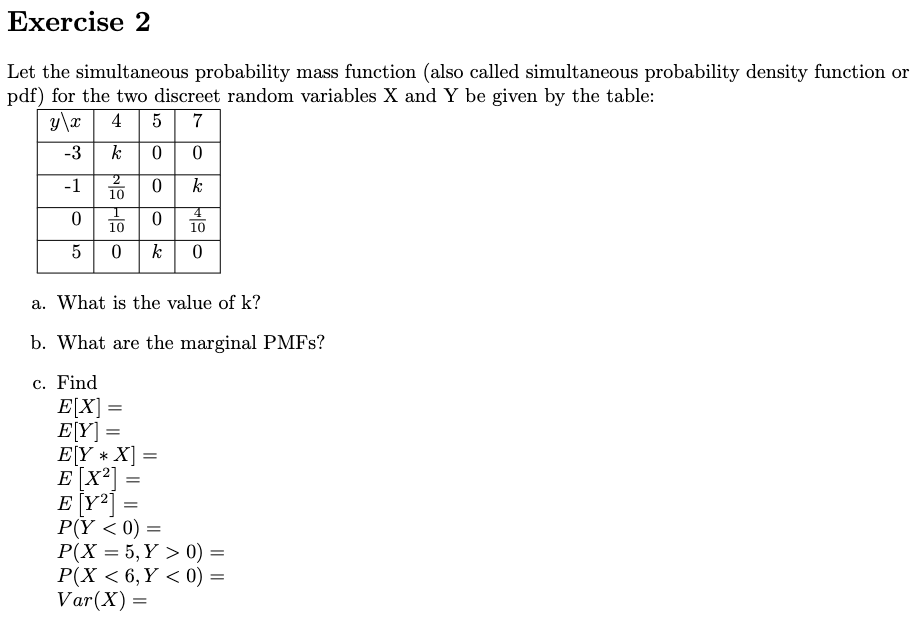

In [4]:
# Exercise 2
Image('https://cdn.mathpix.com/snip/images/rNTJw_NDfeG910a65quj7bpH3nAzFbEaGFalSWLzQuU.original.fullsize.png', width = 500)

In [9]:
# a)

k = symbols('k')

# Define the equations
eq = Eq(3*k + 7/10, 1)

# Solve the set of equations
result = solve(eq, k)
result = nsimplify(result[0], tolerance=1e-10)
print("k:  {} , {}".format(result, float(result)))


k:  1/10 , 0.1


In [11]:
# b)

Index = [-3, -1, 0, 5]
Columns = {
    4: [R(1,10), R(2,10), R(1,10), 0],
    5: [0, 0, 0, R(1,10)],
    7: [0, R(1,10), R(4,10), 0]
}
joint_pmf_df = pd.DataFrame(data = Columns, index = Index)

# Calculate the marginal probabilities of X and Y
marginal_pmf_x = joint_pmf_df.sum(axis=0)
marginal_pmf_y = joint_pmf_df.apply(lambda row: sum(row), axis=1)

print(marginal_pmf_x)
print(marginal_pmf_y)

4     2/5
5    1/10
7     1/2
dtype: object
-3    1/10
-1    3/10
 0     1/2
 5    1/10
dtype: object


In [17]:
# c)

marginal_pmf_x_values = marginal_pmf_x.values
marginal_pmf_y_values = marginal_pmf_y.values

EX = np.array(joint_pmf_df.columns).dot(marginal_pmf_x_values)
EY = np.array(joint_pmf_df.index).dot(marginal_pmf_y_values)
EXY = np.array(joint_pmf_df.index).dot(np.array(joint_pmf_df)).dot(np.array(joint_pmf_df.columns))

EX2 = (np.array(joint_pmf_df.columns)**2).dot(marginal_pmf_x_values)
EY2 = (np.array(joint_pmf_df.index)**2).dot(marginal_pmf_y_values)

VX = EX2 - EX**2
VY = EY2 - EY**2

print("E[X]:  {} , {}".format(EX, round(float(EX), 2)))
print("E[Y]:  {} , {}".format(EY, round(float(EY), 2)))
print("E[X^2]:  {} , {}".format(EX2, round(float(EX2), 2)))
print("E[Y^2]:  {} , {}".format(EY2, round(float(EY2), 2)))
print("E[X*Y]: {} , {}".format(EXY, round(float(EXY), 2)))
print("Var[X]:  {} , {}".format(VX, round(float(VX), 2)))
print("Var[Y]:  {} , {}".format(VY, round(float(VY), 2)))

# P(Y < 0) = 2/5  - from table
# P(X = 5 and Y > 0) = 1/10 - from table
# P(X < 6 and Y < 0) = 3/10 - from table

E[X]:  28/5 , 5.6
E[Y]:  -1/10 , -0.1
E[X^2]:  167/5 , 33.4
E[Y^2]:  37/10 , 3.7
E[X*Y]: -1/5 , -0.2
Var[X]:  51/25 , 2.04
Var[Y]:  369/100 , 3.69
X and Y are not independent.


/var/folders/22/rg8206c93c77krq73zpytwzr0000gn/T/ipykernel_9417/3001273262.py:36: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  is_independent = np.isclose(joint_pmf_float.values, marginal_pmf_x[:, np.newaxis] * marginal_pmf_y.values).all()


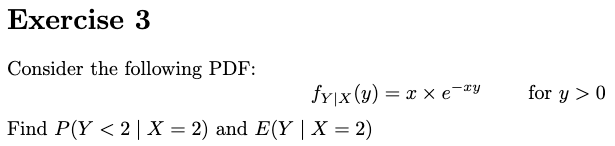

In [5]:
# Exercise 3
Image('https://cdn.mathpix.com/snip/images/js8kPDUorXMmiLaNC--wqEtk5NsNkaZ29ogw_AVI7Wo.original.fullsize.png', width = 500)

In [4]:
x, y = symbols('x y')

# P(Y < 2 | X = 2)
result = smp.integrate(2*E**(-2*y), (y, 0, 2))
print(result)

# E(Y | X = 2)
result = smp.integrate(2*y*E**(-2*y), (y, 0, oo))
print(result)

1 - exp(-4)
1/2


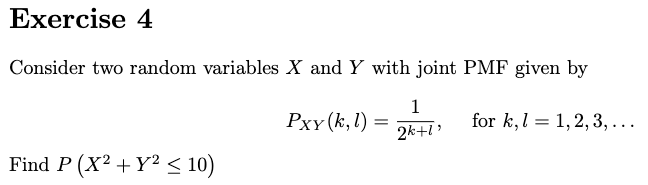

In [6]:
# Exercise 4
Image('https://cdn.mathpix.com/snip/images/EwxDydNr303_FTv7e5LEKsYM8TM2b7eFrrvCs5Tgbs8.original.fullsize.png', width = 500)

In [ ]:
# Not practical in Python

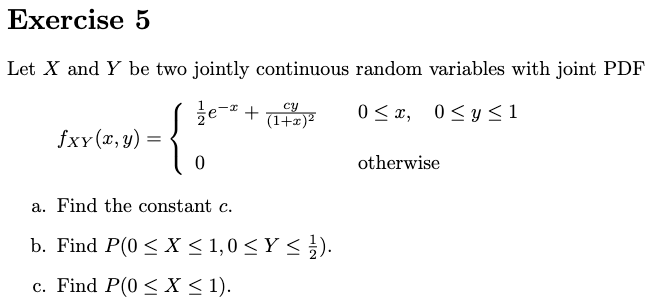

In [7]:
# Exercise 5
Image('https://cdn.mathpix.com/snip/images/kLiAL7ieWnOpWYcFTmqdRTWAOpdWcUg7t9_b7kDQ1WE.original.fullsize.png', width = 500)

In [8]:
# a)
x, y, c = symbols('x y c')

result = solve(smp.integrate(R(1,2)*E**(-x)+(c*y)/((1+x)**2), (x, 0, oo), (y, 0, 1)) - 1, c)

print("c: ", result[0])

c:  1


In [15]:
# b)
smp.integrate((R(1,2)*E**(-x)) + (y/(1+x)**2), (x, 0, 1), (y, 0, R(1,2)))

1/16 + (-1 + E)*exp(-1)/4

In [9]:
# c)
x, y = symbols('x y')

display(smp.integrate((R(1,2)*E**(-x)) + (y/(1+x)**2), (x, 0, 1), (y, 0, 1)))
display(smp.integrate((R(1,2)*E**(-x)) + (y/(1+x)**2), (y, 0, 1), (x, 0, 1)))

1/4 + (-1 + E)*exp(-1)/2

3/4 - exp(-1)/2

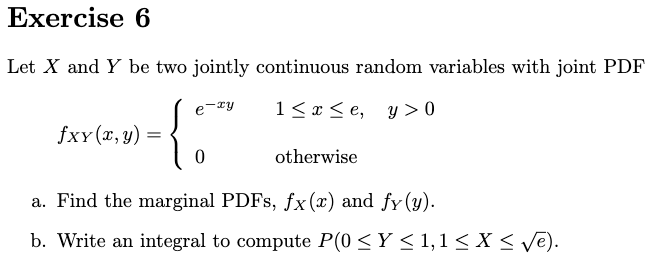

In [8]:
# Exercise 6
Image('https://cdn.mathpix.com/snip/images/3ysL0T6k_lwLv3V8Q--SSGhoGeR28MSIuAzZniq-5p0.original.fullsize.png', width = 500)

In [10]:
# a)
fx = smp.integrate(E**(-x*y), (y, 0, oo), conds = "none")
fy = smp.integrate(E**(-x*y), (x, 1, E), conds = "none")
display(fx, fy)

1/x

-exp(-E*y)/y + exp(-y)/y

In [12]:
# b)
smp.integrate(E**(-x*y), (y, 0, 1), (x, 1, math.sqrt(E)))

0.5 - Ei(1.64872127070013*exp_polar(I*pi)) + Ei(exp_polar(I*pi))

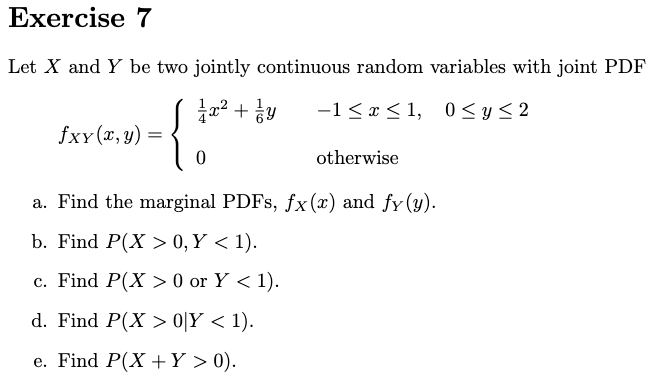

In [9]:
# Exercise 7
Image('https://cdn.mathpix.com/snip/images/xKG5Fm-gl4j0OtO6xvbV3BnSwPOCwWGTXL3uhQ2i7yk.original.fullsize.png', width = 500)

In [13]:
# a

fxy = R(1,4)*x**2 + R(1,6)*y
fx = smp.integrate(fxy, (y, 0, 2))
fy = smp.integrate(fxy, (x, -1, 1))
display(fx, fy)

x**2/2 + 1/3

y/3 + 1/6

In [14]:
# b

smp.integrate(fxy, (y, 0, 1), (x, 0, 1))

1/6

In [15]:
# c
1 - smp.integrate(fxy, (y, 1, 2), (x, -1, 0)) # method 1

2/3

In [16]:
# d
display(
1 / (6 * smp.integrate(fxy, (x, -1, 1), (y, 0, 1))),
1 / (6 * smp.integrate(fy, (y, 0, 1))))

1/2

1/2

In [17]:
# e

1 - smp.integrate(fxy, (y, 0, -x), (x, -1, 0))

131/144